In [1]:
import numpy as np
import pandas as pd

In [2]:
from zipfile import ZipFile
file = ZipFile('./compustat.zip','r')

In [3]:
df = pd.read_csv(file.open('compustat.csv'))

In [4]:
df.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [5]:
df.shape

(1811299, 17)

In [6]:
# select only the columns that we are interested in
df = df[['cusip', 'datacqtr', 'saleq', 'sic', 'prccq', 'cshoq']]

In [7]:
# market cap needs additional calculation
df['mktcap'] = df['prccq'] * df['cshoq']

In [8]:
df.shape

(1811299, 7)

# Compute Statistics for saleq and mktcap

mean

In [10]:
df['saleq'].mean()

445.1506638794502

In [11]:
df['mktcap'].mean()

2057.4731042025583

standard deviation

In [12]:
df['saleq'].std()

2679.7065764082604

In [13]:
df['mktcap'].std()

13202.197457099019

count of missing values

In [14]:
df.isna().sum()[['saleq', 'mktcap']]

saleq     269498
mktcap    468276
dtype: int64

ratio of missing values

In [15]:
df.isna().sum()[['saleq', 'mktcap']] / df.shape[0]

saleq     0.148787
mktcap    0.258530
dtype: float64

aggregate the result in a dataframe

In [16]:
result = pd.DataFrame(columns = ['saleq', 'mktcap'], index = ['mean', 'std', 'nan', 'nan ratio'])

In [17]:
result.loc['mean', 'saleq'] = df['saleq'].mean()
result.loc['mean', 'mktcap'] = df['mktcap'].mean()

result.loc['std', 'saleq'] = df['saleq'].std()
result.loc['std', 'mktcap'] = df['mktcap'].std()

result.loc['nan', 'saleq'] = df['saleq'].isna().sum()
result.loc['nan', 'mktcap'] = df['mktcap'].isna().sum()

result.loc['nan ratio', 'saleq'] = result.loc['nan', 'saleq'] / df.shape[0]
result.loc['nan ratio', 'mktcap'] = result.loc['nan', 'mktcap'] / df.shape[0]

In [18]:
result

,saleq,mktcap
mean,445.151,2057.47
std,2679.71,13202.2
nan,269498,468276
nan ratio,0.148787,0.25853


# Outliers

In [67]:
from matplotlib import pyplot as plt

<AxesSubplot:>

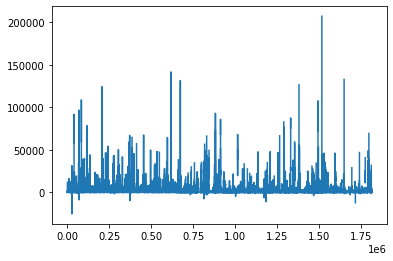

In [20]:
df['saleq'].plot()

<AxesSubplot:>

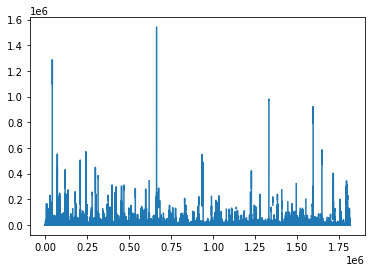

In [21]:
df['mktcap'].plot()

we can see there are many outliers

implement a scheme: boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f60e92fb550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f60e92fbdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f60e93c6990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f60e93076d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f60e9307b10>],
 'means': []}

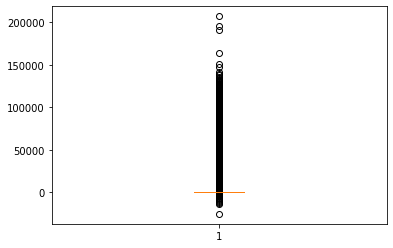

In [22]:
plt.boxplot(df['saleq'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f60e926a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f60e926ac50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f60e92bc710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f60e9276550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f60e9276990>],
 'means': []}

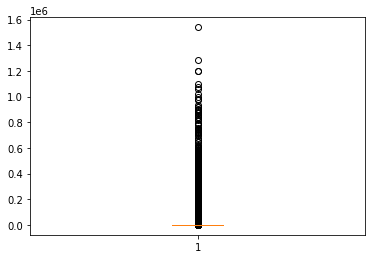

In [23]:
plt.boxplot(df['mktcap'].dropna())

There are many outliers. In fact, there are too many outliers that the box in the box plot is too thin to be a box.
The reason could be that "sales of the current quarter" and "market cap" both indicate the scale of a company. Most of the companies are of smaller scale, while some big companies can be very big. That's why we observe an extremely  skewed distribution.

From table 2, we observe that the std for both indicators are large. That's also because of the reason mentioned above.

# Compute Industry Concentration

In [9]:
df['ind'] = df['sic'].astype('str')  # industry code

In [10]:
df['ind'] = df['ind'].str[:2]

In [11]:
df.head()

,cusip,datacqtr,saleq,sic,prccq,cshoq,mktcap,ind
0,000032102,1966Q1,NaN,3089.0,NaN,0.219,NaN,30
1,000032102,1966Q2,NaN,3089.0,NaN,0.219,NaN,30
2,000032102,1966Q3,NaN,3089.0,NaN,0.219,NaN,30
3,000032102,1966Q4,4.032,3089.0,NaN,0.219,NaN,30
4,000032102,1967Q1,NaN,3089.0,NaN,0.277,NaN,30


In [12]:
df.ind.unique()  # there shouldn't be 'na' in industry

array(['30', '58', '57', '50', '37', '27', '36', '35', '34', '48', '33',
       '65', '38', '73', '32', '45', '67', '79', '39', '20', '28', '78',
       '23', '87', '49', '59', '26', '56', '13', '51', '63', '22', '60',
       '62', '99', '10', '47', '12', '54', '64', '44', '70', '80', '53',
       '42', '61', '75', '17', '14', '15', '25', '31', '24', '29', '72',
       '46', '40', '16', '82', '21', '55', '52', '83', '41', '90', '84',
       '76', '89', 'na', '81', '86'], dtype=object)

In [25]:
df.dropna(axis = 0, subset = ['sic', 'mktcap'], inplace = True)

In [26]:
df.ind.unique()

array(['30', '58', '57', '50', '37', '27', '36', '35', '34', '48', '33',
       '65', '38', '73', '32', '45', '67', '79', '39', '28', '78', '23',
       '87', '49', '26', '56', '13', '51', '63', '59', '22', '60', '62',
       '99', '10', '47', '12', '54', '64', '44', '20', '70', '80', '53',
       '42', '75', '17', '14', '15', '61', '25', '31', '24', '29', '72',
       '16', '40', '21', '82', '55', '52', '83', '41', '90', '84', '76',
       '46', '89', '81', '86'], dtype=object)

In [27]:
len(df.ind.unique())

70

In [28]:
df['total_mktcap'] = df.groupby(['ind', 'datacqtr'])['mktcap'].transform('sum')  # total market cap

In [29]:
df['mktshare'] = df['mktcap'] / df['total_mktcap'] * 100

In [30]:
df['mktshare_square'] = df['mktshare'] ** 2

In [31]:
df['HHI'] = df.groupby(['ind', 'datacqtr'])['mktshare_square'].transform('sum')

In [32]:
df.head()

,cusip,datacqtr,saleq,sic,prccq,cshoq,mktcap,ind,total_mktcap,mktshare,mktshare_square,HHI
18,000032102,1970Q3,10.698,3089.0,11.750,2.230,26.202500,30,6289.293375,0.416621,0.173573,1682.455305
19,000032102,1970Q4,10.919,3089.0,10.000,2.446,24.460000,30,8067.256308,0.303201,0.091931,1424.771672
20,000032102,1971Q1,7.983,3089.0,9.750,3.507,34.193250,30,8700.795835,0.392990,0.154441,1292.447644
21,000032102,1971Q2,9.885,3089.0,8.250,3.518,29.023500,30,9039.093803,0.321089,0.103098,1296.213826
22,000032102,1971Q3,7.975,3089.0,4.625,3.515,16.256875,30,9224.606151,0.176234,0.031058,1289.251544


In [34]:
df['HHI_avg'] = df.groupby('ind')['HHI'].transform('mean')  # average through time

In [41]:
HHI = df[['ind', 'HHI_avg']].drop_duplicates()

In [44]:
HHI.sort_values('HHI_avg')

,ind,HHI_avg
1452,67,125.394041
4023,49,158.453139
8051,60,259.110647
1584,28,360.116710
5116,13,384.596336
...,...,...
221263,90,8726.336351
225009,84,8800.118852
1240836,81,9134.847753
708856,89,10000.000000


get rid of 89 and 86 because they only include ONE company

In [49]:
HHI = HHI[(HHI.ind != '86') & (HHI.ind != '89')]

In [53]:
HHI.sort_values('HHI_avg', ascending = False).head(4)

,ind,HHI_avg
1240836,81,9134.847753
225009,84,8800.118852
221263,90,8726.336351
177694,41,6732.737001


/home/kai/miniconda3/envs/python3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/kai/miniconda3/envs/python3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/kai/miniconda3/envs/python3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/kai/miniconda3/envs/python3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'ind = 41'}, xlabel='datacqtr'>

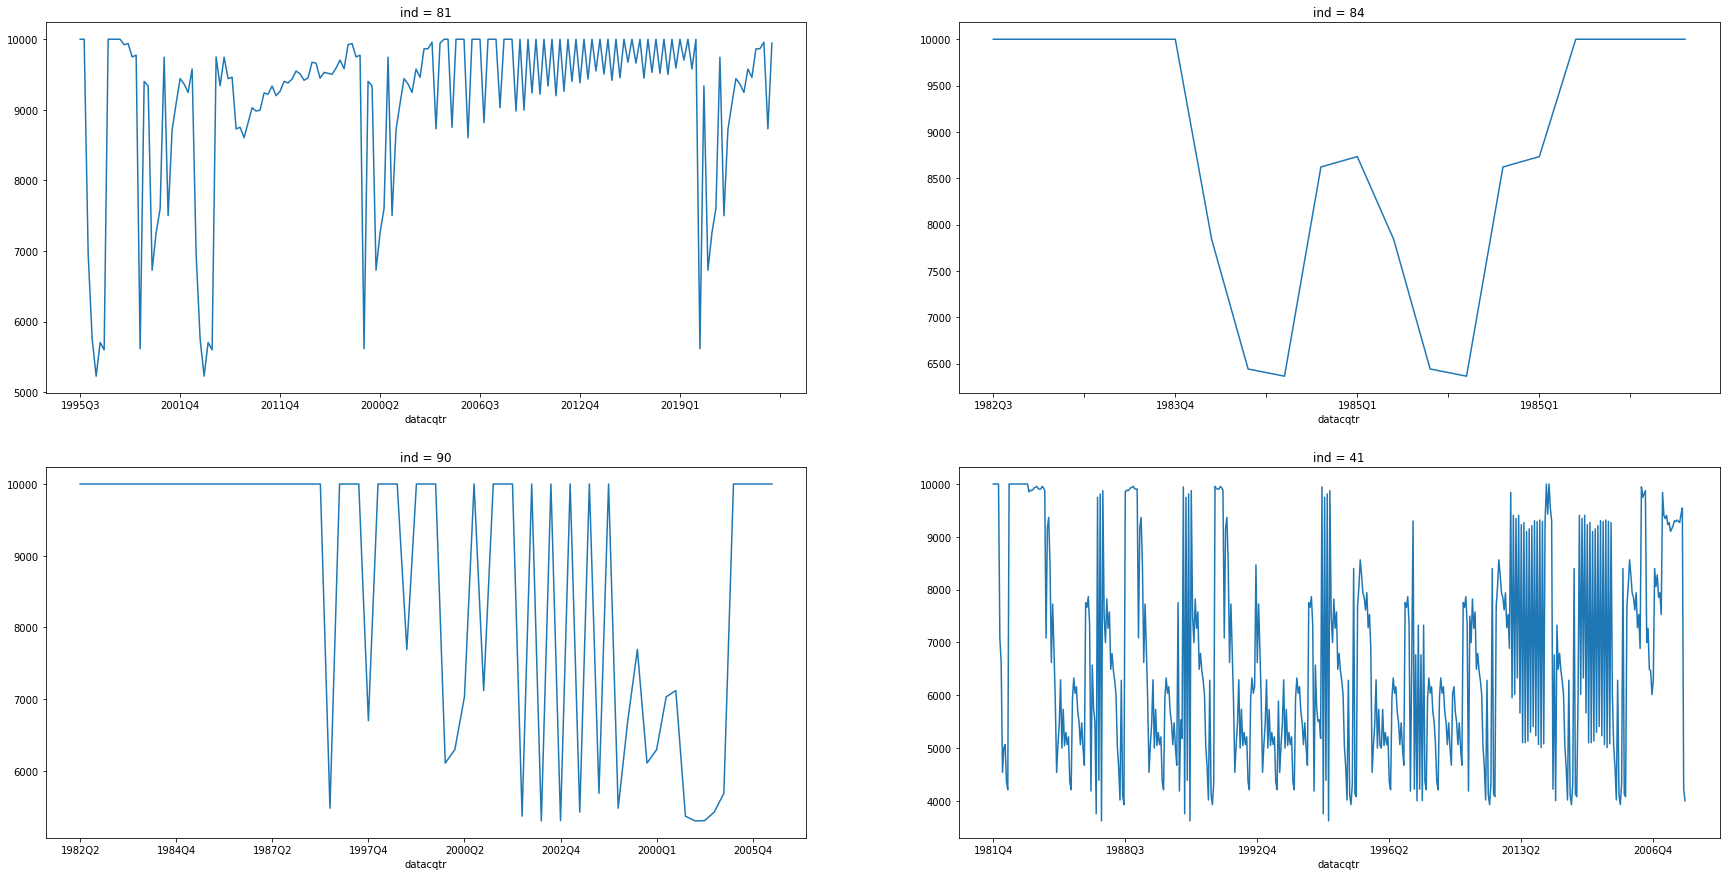

In [78]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 15))
df.loc[df.ind == '81'].set_index('datacqtr')['HHI'].plot(ax = axes[0, 0], title = 'ind = 81')
df.loc[df.ind == '84'].set_index('datacqtr')['HHI'].plot(ax = axes[0, 1], title = 'ind = 84')
df.loc[df.ind == '90'].set_index('datacqtr')['HHI'].plot(ax = axes[1, 0], title = 'ind = 90')
df.loc[df.ind == '41'].set_index('datacqtr')['HHI'].plot(ax = axes[1, 1], title = 'ind = 41')